<a href="https://colab.research.google.com/github/InnerStrength/FPS-Fatal_Police_Shootings-2016_2022/blob/main/FPS(Fatal_Police_Shootings)_2016_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Are Police Shootings on the rise?
## Who's Getting Shot?
## What Are the Trends?
<p> Today we're going to investigate, and analyze the unbiased data, to get down to the bottom of this epidemic </p>  


# Setting Up the Table
<p> This first section is just importing our modules and building our table, getting it ready to observe further.</p>

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import numpy as np

In [151]:
# --- Let's first take a look at what the table looks like and slim it down to
# --- something more legible.

shootings = pd.read_csv("fatal-police-shootings-data.csv")
print(shootings.shape)
print(shootings.columns)
print(shootings.head())
print(shootings.tail())

shootings = shootings[['id', 'name', 'date', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera']]
shootings.head()


(6972, 17)
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')
   id                name        date  ... longitude latitude  is_geocoding_exact
0   3          Tim Elliot  2015-01-02  ...  -123.122   47.247                True
1   4    Lewis Lee Lembke  2015-01-02  ...  -122.892   45.487                True
2   5  John Paul Quintero  2015-01-03  ...   -97.281   37.695                True
3   8     Matthew Hoffman  2015-01-04  ...  -122.422   37.763                True
4   9   Michael Rodriguez  2015-01-04  ...  -104.692   40.384                True

[5 rows x 17 columns]
        id                   name  ... latitude is_geocoding_exact
6967  7454       Stephanie Wilson  ...      NaN               True
6968  7465  Isaiah Tyree Williams  ...      NaN               True
6969  7467          Issa

,id,name,date,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [152]:
# --- Let's convert date into a datetime element for graphing purposes later

shootings.date = pd.to_datetime(shootings.date)
shootings.date = pd.to_datetime(shootings.date).dt.strftime('%m-%Y')
shootings.date

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0       01-2015
1       01-2015
2       01-2015
3       01-2015
4       01-2015
         ...   
6967    01-2022
6968    01-2022
6969    01-2022
6970    01-2022
6971    01-2022
Name: date, Length: 6972, dtype: object

In [153]:
shootings = shootings.fillna(value="N/A")

In [154]:
shootings.isna().values.any()

False

# Basic Analysis
<p> This next section will begin to observe each column to give us an idea of what the large scale overview of the data tells us </p>

In [175]:
years = shootings.copy()
years.date = pd.to_datetime(shootings.date).dt.strftime('%Y')
years[["date","id"]].groupby("date").count().sort_values("id", ascending=False)

,id
date,
2020,1021
2021,1014
2019,999
2015,994
2018,990
2017,984
2016,957
2022,13


In [177]:
decade_df = shootings.copy()
index = 0
for age in decade_df["age"]:
  try:
    decade_df["age"][index] = round(int(age)/5)*5
  except ValueError:
    pass
  index += 1
decade_df[["age","id"]].groupby("age").count().sort_values("id", ascending=False).head(20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,id
age,
30,1091
35,1041
25,985
40,768
45,602
20,597
50,496
N/A,365
55,363


In [314]:
shootings[["armed","id"]].groupby("armed").count().sort_values("id", ascending=False).head(10)

id
armed        race      
gun          W     1746
             B      951
             N/A    654
             H      553
knife        W      438
             H      189
             B      178
unarmed      W      176
knife        N/A    137
unarmed      B      137
toy weapon   W      125
N/A          W       94
vehicle      W       86
undetermined N/A     80
unarmed      H       80
undetermined W       70
vehicle      N/A     57
N/A          B       56
vehicle      B       55
gun          N       46

In [178]:
shootings[["flee","id"]].groupby("flee").count().sort_values("id", ascending=False).head()

,id
flee,
Not fleeing,4118
Car,1136
Foot,890
N/A,566
Other,262


In [60]:
shootings[["gender","id"]].groupby("gender").count().sort_values("id", ascending=False).head()

,id
gender,
M,6644
F,314


In [53]:
shootings[["race","id"]].groupby("race").count().sort_values("id", ascending=False).head()

,id
race,
W,2977
B,1562
N/A,1102
H,1087
A,106


In [49]:
shootings[["threat_level","id"]].groupby("threat_level").count().sort_values("id", ascending=False).head(10)

,id
threat_level,
attack,4471
other,2252
undetermined,249


In [50]:
shootings[["signs_of_mental_illness","id"]].groupby("signs_of_mental_illness").count().sort_values("id", ascending=False).head(10)

,id
signs_of_mental_illness,
False,5430
True,1542


In [311]:
shootings[["state","id"]].groupby("state").count().sort_values("id", ascending=False).head(10)

state  race
CA     H       381
       W       259
TX     W       204
FL     W       191
CA     N/A     177
              ... 
VA     A         1
MO     A         1
SC     A         1
VA     N         1
MS     H         1
Length: 256, dtype: int64

In [184]:
shootings[["city","state","id"]].groupby("city").count().sort_values("id", ascending=False).head(20)

,state,id
city,,
Los Angeles,114,114
Phoenix,96,96
Houston,76,76
Las Vegas,61,61
San Antonio,61,61
Chicago,48,48
Columbus,45,45
Albuquerque,45,45
Denver,42,42


In [59]:
shootings[["body_camera","id"]].groupby("body_camera").count().sort_values("id", ascending=False).head()

,id
body_camera,
False,6005
True,967


## Basic Conclusion
<ol>
  <li> 33% of all Fatal Police Shootings occured in three states. </li>
    <ul><li>Those 3 states CA, TX, FL: 25% of U.S. population</li>
    <li>80% of FPS occur in just 10 states.
    <li>90% of FPS occur in 15 states. </ul>
  <li> 96% of all FPS deathes are men. </li>
  <li> POC are aprox 50% of all killed, although they are only 30% of the population. </li>
    <ul><li>Black Americans are a quarter of all deaths   
    while only being 12% of the population.</li></ul>
  <li> in 2/5ths of all FPS the person shot didn't have a gun.</li>
    <ul>
    <li> 9.4% of all those killed were unarmed individuals.
    </li>
    <li> 25% of FPS did not involve a deadly weapon. </li>
    </ul>
  <li> FPS are on the rise each year, however at a signifcantly insignficant rate. </li>
    <ul><li>Approx. 1% a year since 2016</li></ul>
  <li> Although speculative as to what other or undetermined mean; Only 2/3rds of all FPS were classified as the officers being "attacked".</li>
  <li> 40% of all FPS occur to individuals between 25-35</li>
    <ul><li>10% of all FPS occur to Children and Teens under the age of 20. </li></ul>
  <li> in 40% of all FPS the officer was not in immediate danger (the individual was fleeing).</li>
  <li> Only 15% of FPS have Body Cam footage; while 50% of police forces use body cameras at the start of dataset and has grown since</li>
      <ul><li>The use of body cameras drastically drops the likelihood of a FPS. </li></ul>
  <li> No surprise large cities have the most FPS </li>
      <ul>
    <li> Los Angeles: 114, <br>Phoenix: 96, <br>Houston: 76, <br>Las Vegas:61, <br>San Antonio: 61
    </li>
    <li> More surprising NYC was 15th with only 34 FPS in 6 years. NYC has been using body cameras since 2014 and was fully cammed by early 2019. </li>
    </ul>

# Stastical Speculation and Graphs
Using some of the basic conclusions that we found from the previous section we will now dive deeper into the data to see what kind of trends we can learn based off some of these demographical conclusions.

In each analysis I will place a comment to describe what information will be used and the hypothesis for the expected conclusion.

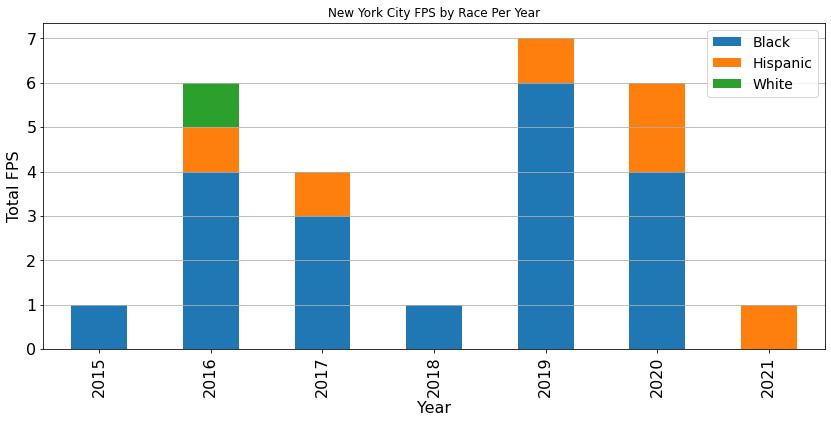

In [67]:
# --- Hypothesis with the unrolling of body cams the FPS per year would decrease

nyc = shootings[shootings.city == "New York"][["date","race","id"]]
nyc.date = pd.to_datetime(nyc.date).dt.strftime('%Y')
nyc = nyc.groupby("date")['race'].value_counts().unstack().drop("N/A", axis=1)
nyc

nyc.plot.bar(stacked=True, figsize=(14,6), width=.5)
plt.ylabel("Total FPS",fontsize=16)
plt.title("New York City FPS by Race Per Year")
plt.xlabel("Year", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.gca().yaxis.grid()


plt.legend(fontsize=14, labels=["Black", "Hispanic", "White"])
plt.show()

# -- Findings: FPS declined up until 2019, spiked, and has been decreasing
#

                body_cam  no_cam bc_percent
gun                  504  3505.0        12%
knife                168   833.0        16%
unarmed               89   347.0        20%
toy weapon            45   189.0        19%
vehicle               25   212.0        10%
undetermined          24   195.0        10%
N/A                   17   192.0         8%
Taser                  9    27.0        25%
machete                8    47.0        14%
gun and knife          6    19.0        24%
hammer                 6    14.0        30%
unknown weapon         5    87.0         5%
sharp object           5    11.0        31%
metal pipe             4    12.0        25%
BB gun                 4    12.0        25%




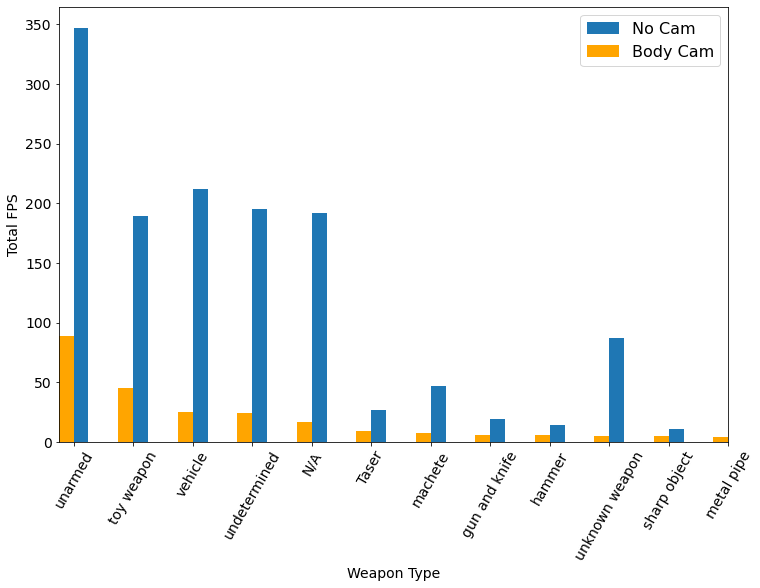

In [109]:
# -- Hypothesis: Increased body camera use will result in lower percentage of
# --             FPS when dealt with non-lethal weapons

body_cam = shootings[shootings.body_camera == True]["armed"].value_counts().to_frame(name="body_cam")
no_cam = shootings[shootings.body_camera == False]["armed"].value_counts().to_frame(name="no_cam")
body_cam["no_cam"] = no_cam.no_cam

percentage = []
i = 0
for item in body_cam.body_cam:
  perc_add = body_cam.body_cam[i]/(body_cam.body_cam[i]+body_cam.no_cam[i])
  try:
    percentage.append(f"{int(perc_add*100)}%")
  except ValueError:
    percentage.append("N/A")
  i += 1

body_cam["bc_percent"] = percentage

print(body_cam.head(15))
print("\n")
body_cam.no_cam[2:14].plot.bar(width=.25,align='edge', figsize=(12,8))
body_cam.body_cam[2:14].plot.bar(color="orange",align='edge', width=-.25)
plt.xlabel("Weapon Type", fontsize=14)
plt.xticks(fontsize=14, rotation=60)
plt.ylabel("Total FPS", fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=["No Cam","Body Cam"], fontsize=16)
plt.show()

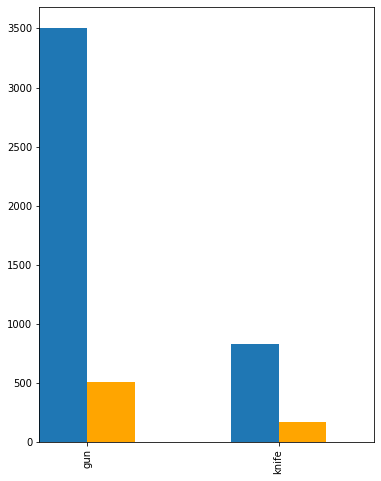

In [77]:
body_cam = shootings[shootings.body_camera == True]["armed"].value_counts().head(11)
no_cam = shootings[shootings.body_camera == False]["armed"].value_counts().head(11)
no_cam[:2].plot.bar(width=-.25,align='edge', figsize=(6,8))
body_cam[:2].plot.bar(color="orange",align='edge', width=.25)

# --- Findings: Body cam cases account for only 13.8% of FPS, in most categories 
# ----- they lay statistically right around their percentages (gun, machete, knife), 
# ----- OR significantly more than their no cam counterparts (hammer, unarmed, sharp object),
# ----- Where they differ is in the unknowns (unknown weapon, N/A, undetermined)

# --- Conclusion: Body cam footage hold police officers accountable to some degree in
# ----- properly documenting any weaponry the slain individual had; one could safely
# ----- conclude on the numbers that the ambiguous weapon categories likely were non-lethal weapons
# ----- as those categories are statistically larger for officers with cam footage

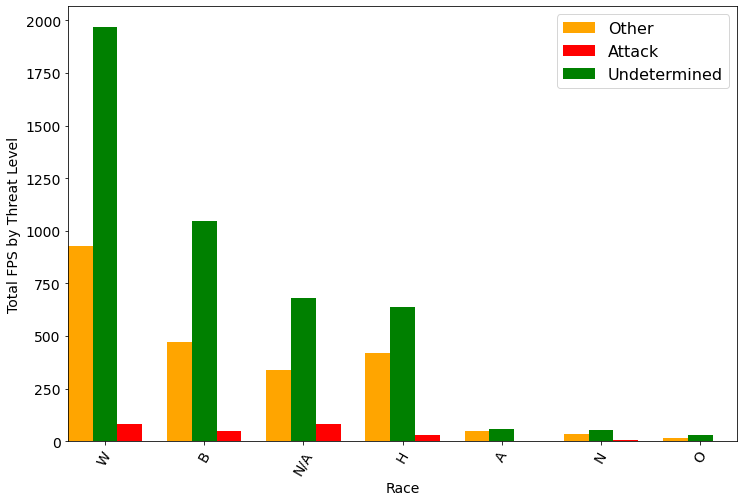

In [136]:
# --- Hypothesis: Threat Level attack will be more white/hispanic, 
# ----- threat level other or undetermined will be more black or undetermined

attack = shootings[shootings.threat_level == "attack"]["race"].value_counts().to_frame(name="attack")
other =  shootings[shootings.threat_level == "other"]["race"].value_counts().to_frame(name="other")
undetermined = shootings[shootings.threat_level == "undetermined"]["race"].value_counts().to_frame(name="undetermined")
attack["other"] = other.other
attack["undetermined"] = undetermined.undetermined

attack.index.values
attack.other.plot.bar(labels, color="orange",align='edge', width=-.375)
attack.undetermined.plot.bar(color="red",align='edge', width=.375)
attack.attack.plot.bar(width=.25,align='center',color="green", figsize=(12,8))

plt.xlabel("Race", fontsize=14)
plt.xticks(fontsize=14, rotation=60)

plt.ylabel("Total FPS by Threat Level", fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=["Other", "Undetermined", "Attack"], fontsize=16)
plt.show()

# --- Findings: White, Black and Unknown races all have statistically insignificant
# ----- differences in their status of attack, other or undetermined.
# ----- Hispanic individuals have a statistically higher likelihood of being in 
# ----- the "other" category, but less in "undetermined"
# --- Conclusion: Race has less effect on the conclusion of attack or other threat level.
# ----- Further analysis to see if body cam effects the likelihood of an FPS being
# ----- documented as attack or Other/Undetermined. Logically if there's no footage
# ----- the status quo would be to report as "he attacked me first".

In [155]:
attack = shootings[shootings.threat_level == "attack"]["body_camera"].value_counts().to_frame(name="attack")
other =  shootings[shootings.threat_level == "other"]["body_camera"].value_counts().to_frame(name="other")
undetermined = shootings[shootings.threat_level == "undetermined"]["body_camera"].value_counts().to_frame(name="undetermined")
attack["other"] = other.other
attack["undetermined"] = undetermined.undetermined
attack.insert(0,"body cam", attack.index)

percentage = []
i = 0
for item in attack.other:
  perc_add = (attack.other[i]+attack.undetermined[i])/attack.attack[i]
  try:
    percentage.append(f"{int(perc_add*100)}%")
  except ValueError:
    percentage.append("N/A")
  i += 1
attack["o/a %"] = percentage

attack

# --- Findings: When Body Cams are not present a report is 1.9 times as likely to be
# ----- documented as an "attack". When Body Cams are present a report is only 1.5 
# ----- times as like to be documented as an "attack".
# --- Conclusion: As predicted by previous chart body cameras also add honesty to
# ----- police reports in determining the threat level of a shot individual. While
# ----- without cameras an officer will more likely file a death as an attack, the
# ----- officer with body cameras will less likely stretch the truth. 

,body cam,attack,other,undetermined,o/a %
False,False,3892,1897,216,54%
True,True,579,355,33,67%


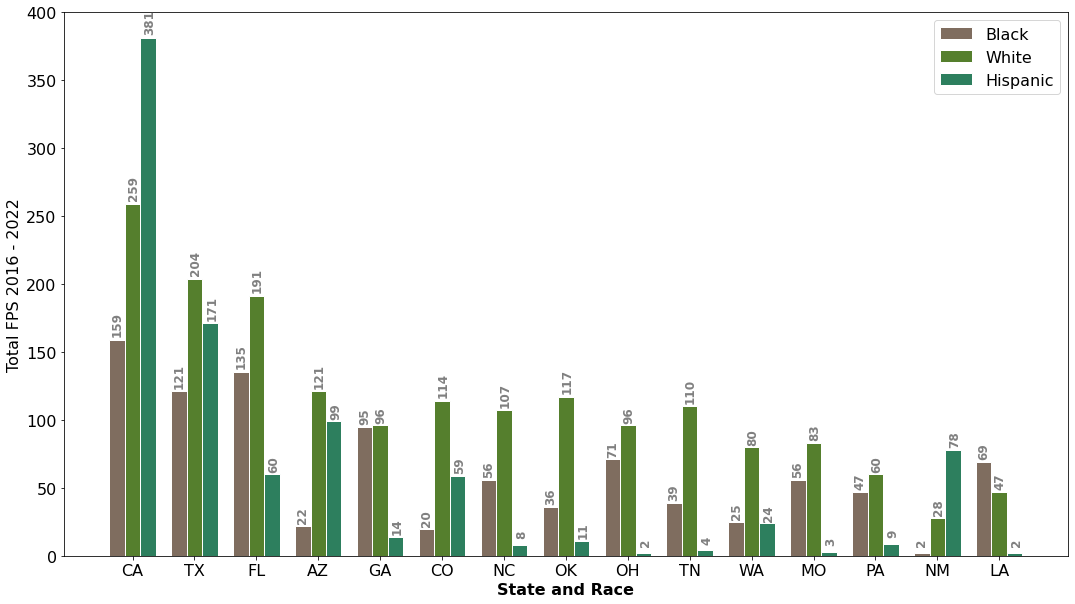

In [241]:
# --- Hypothesis: POC will appear to be lower than white in most states,
# ----- however when compared to their percentage of their states demographics
# ----- the numbers will be more dramatic.

state_to_race = shootings[["race", "state","id"]].groupby(["state","race"]).count().unstack()
state_to_race["total"] = shootings["state"].value_counts()

state_to_race = state_to_race.sort_values("total", ascending=False).head(15)
state_to_race.fillna(0, inplace=True)
state_to_race

barWidth = 0.25

# set heights of bars
bars1 = state_to_race["id"]["B"]
bars2 = state_to_race["id"]["W"]
bars3 = state_to_race["id"]["H"]
bars =[bars1,bars2,bars3]
# # Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(18,10))

plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white')

x=0
for bar in bars:
  i = 0
  for item in bar:
    if item < 100:
      plt.text(i+x, item+8, int(item), fontsize=12, rotation=90,va="center",ha="center", fontweight="bold", color="grey")
    else:
      plt.text(i+x, item+12, int(item), fontsize=12, rotation=90,va="center",ha="center", fontweight="bold", color="grey")
    i +=1
  x += .265
  

plt.ylabel("Total FPS 2016 - 2022", fontsize=16)
plt.xlabel('State and Race', fontweight='bold', fontsize=16)
plt.xticks([r + barWidth for r in range(len(bars1))], state_to_race.index.values, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(labels=["Black", "White", "Hispanic"], fontsize=16)
plt.show()

# --- Findings: Outside of California, it is a true statement that more white people
# ----- are victims of FPS. It's important to note this data does not include race
# ----- 'unknown' which are undoubtly POC of some sort. it should be added that
# ----- only the first 15 states were graphed as these 15 states account for 90% of
# ----- all FPS.
# --- Conclusions: Although one could argue that this supports the claim that "more
# ----- white people are shot and killed by the police than black people", this data
# ----- actually shockingly proves otherwise. The nationwide avg for the african american
# ----- demographic is approximately 12%, where as in all these states their share 
# ----- of deaths are dramatically higher. For example California 20% of FPS go to Black,
# ----- where their demographic share is only 5% of California. A similar trend follows
# ----- the rest of the states. Additional research would be interesting to find
# ----- the demographic percentages and populations to see the per capita profiles.

# New Section